## Simple Linear regression

We present below an example of fitting a simple linear regression model using (scikit-learn) on a demo dataset. We will then plot the regression line. See source link [here](https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f).

In [225]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [226]:
dataset = pd.read_csv('/Users/kushaldey/Documents/Python_tutorial/Weather.csv')

In [227]:
dataset.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [228]:
dataset.describe()

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,...,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,119040.000000,532.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,533.000000,532.000000,...,0.0,0.0,0.0,0.0,525.000000,0.0,0.0,0.0,0.0,0.0
mean,29659.435795,37.774534,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,26.998124,20.396617,...,NaN,NaN,NaN,NaN,12.085333,NaN,NaN,NaN,NaN,NaN
std,20953.209402,10.297808,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,15.221732,5.560371,...,NaN,NaN,NaN,NaN,5.731328,NaN,NaN,NaN,NaN,NaN
min,10001.000000,18.520000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,2.000000,10.000000,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,11801.000000,29.632000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,11.000000,16.000000,...,NaN,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,NaN,NaN
50%,22508.000000,37.040000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,32.000000,20.000000,...,NaN,NaN,NaN,NaN,11.600000,NaN,NaN,NaN,NaN,NaN
75%,33501.000000,43.059000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,34.000000,23.250000,...,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN
max,82506.000000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,...,NaN,NaN,NaN,NaN,23.900000,NaN,NaN,NaN,NaN,NaN


In [229]:
type(dataset)

pandas.core.frame.DataFrame

In [230]:
dataset.shape

(119040, 31)

In [231]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
STA            119040 non-null int64
Date           119040 non-null object
Precip         119040 non-null object
WindGustSpd    532 non-null float64
MaxTemp        119040 non-null float64
MinTemp        119040 non-null float64
MeanTemp       119040 non-null float64
Snowfall       117877 non-null object
PoorWeather    34237 non-null object
YR             119040 non-null int64
MO             119040 non-null int64
DA             119040 non-null int64
PRCP           117108 non-null object
DR             533 non-null float64
SPD            532 non-null float64
MAX            118566 non-null float64
MIN            118572 non-null float64
MEA            118542 non-null float64
SNF            117877 non-null object
SND            5563 non-null float64
FT             0 non-null float64
FB             0 non-null float64
FTI            0 non-null float64
ITH            0 non-null float64

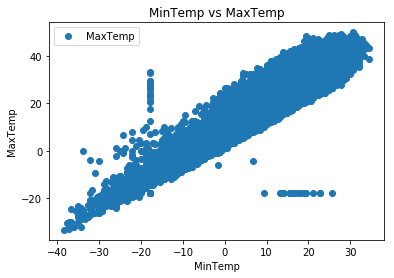

In [232]:
dataset.plot(x='MinTemp', y='MaxTemp', style = "o")  
plt.title('MinTemp vs MaxTemp')  
plt.xlabel('MinTemp')  
plt.ylabel('MaxTemp')  
plt.show()

In [233]:
X = dataset['MinTemp'].values.reshape(-1,1)
X[:5], type(X), X.shape

(array([[22.22222222],
        [21.66666667],
        [22.22222222],
        [22.22222222],
        [21.66666667]]), numpy.ndarray, (119040, 1))

In [234]:
X = dataset['MinTemp'].values.reshape(-1,1)
y = dataset['MaxTemp'].values.reshape(-1,1)
X.shape, y.shape

((119040, 1), (119040, 1))

In [235]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [236]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [237]:
print(regressor.intercept_) ######### . intercept of the regression line  (c in y = mx +c )

[10.66185201]


In [238]:
print(regressor.coef_)  ########### . slope of the regression line (m in y = mx + c)

[[0.92033997]]


In [240]:
y_pred = regressor.predict(X_test)
y_pred.flatten()

array([33.67035117, 30.0912513 , 26.51215143, ..., 32.64775121,
       30.60255128, 31.62515124])

In [157]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,28.888889,33.670351
1,31.111111,30.091251
2,27.222222,26.512151
3,28.888889,31.113851
4,23.333333,15.774852
5,37.222222,30.602551
6,22.222222,11.684452
7,35.555556,33.670351
8,30.555556,30.602551
9,28.888889,32.647751


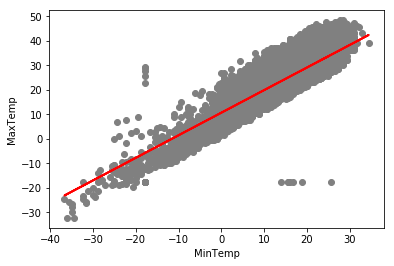

In [158]:
################### . Draw a scatter plot .  ########################
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('MinTemp')  
plt.ylabel('MaxTemp')  
plt.show()

In [159]:
################# . Metrics of how good the fit is (the smaller the better)  ############################

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

('Mean Absolute Error:', 3.1993291783785285)
('Mean Squared Error:', 17.631568097568444)
('Root Mean Squared Error:', 4.198996082109204)


## Multiple Linear regression

Now we will see an example where the number of independent variables X in linear regression is more than 1. This problem is called multiple linear regression.

In [160]:
dataset = pd.read_csv('/Users/kushaldey/Documents/Python_tutorial/winequality.csv')

In [161]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [162]:
dataset.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [163]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [164]:
dataset = dataset.fillna(method='ffill')

In [165]:
X = dataset[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol']].values
y = dataset['quality'].values.reshape(-1,1)
X.shape, y.shape, type(X), type(y)

((1599, 11), (1599, 1), numpy.ndarray, numpy.ndarray)

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [167]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [168]:
print(regressor.coef_)
print(regressor.intercept_)
OLS = np.concatenate([regressor.intercept_.flatten(), regressor.coef_.flatten()])

[[ 4.12835075e-02 -1.14952802e+00 -1.77927063e-01  2.78700036e-02
  -1.87340739e+00  2.68362616e-03 -2.77748370e-03 -3.15166657e+01
  -2.54486051e-01  9.24040106e-01  2.67797417e-01]]
[34.99871063]


In [169]:
y_pred = regressor.predict(X_test)
y_pred[:10,:], y_test[:10,:]

(array([[5.7829301 ],
        [5.03619267],
        [6.59698929],
        [5.33912637],
        [5.93952898],
        [5.0072068 ],
        [5.39616171],
        [6.05211188],
        [4.86760343],
        [4.95067572]]), array([[6],
        [5],
        [7],
        [6],
        [5],
        [6],
        [5],
        [6],
        [4],
        [5]]))

In [170]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df.head(25)

,Actual,Predicted
0,6,5.782930
1,5,5.036193
2,7,6.596989
3,6,5.339126
4,5,5.939529
5,6,5.007207
6,5,5.396162
7,6,6.052112
8,4,4.867603
9,5,4.950676


In [171]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

('Mean Absolute Error:', 0.46963309286611016)
('Mean Squared Error:', 0.3844711978201237)
('Root Mean Squared Error:', 0.6200574149384263)


## Ridge regression and LASSO

Ridge regression and Lasso: both are models that assume for multiple linear regression that some of the coefficients are going to be close to 0. This assumption is not made by standard multiple regression.

### Ridge regression

In [172]:
from sklearn.linear_model import Ridge
regressor =  Ridge(alpha=.5)
regressor.fit(X_train, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [173]:
print(regressor.coef_)
print(regressor.intercept_)

[[ 0.01559734 -1.18175093 -0.19409204  0.01388913 -1.54919923  0.00292853
  -0.00279982 -0.05058925 -0.37172375  0.83226518  0.30056181]]
[3.98221978]


Above we assumed the value of alpha, a tuning parmeter to be 0.5. We can choose a better value of alpha using the concept of cross validation. Luckily, cross-validated Ridge regression is also implemented in python.

In [174]:
np.logspace(-6, 6, 13)

array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06])

In [175]:
from sklearn.linear_model import RidgeCV
regressor = RidgeCV(alphas=np.logspace(-6, 6, 13))
regressor.fit(X_train, y_train)

RidgeCV(alphas=array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06]),
    cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=False)

In [176]:
regressor.alpha_

0.1

In [177]:
print(regressor.coef_)
print(regressor.intercept_)
Ridge = np.concatenate([regressor.intercept_.flatten(), regressor.coef_.flatten()])

[[ 0.01296985 -1.17604638 -0.18334341  0.01473644 -1.84199931  0.00297255
  -0.0028557  -0.23279898 -0.40254805  0.86946029  0.2974282 ]]
[4.31518263]


### Lasso

In [178]:
from sklearn.linear_model import LassoCV
regressor = LassoCV(alphas=np.logspace(-6, 6, 13))
regressor.fit(X_train, y_train.flatten())

LassoCV(alphas=array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06]),
    copy_X=True, cv=None, eps=0.001, fit_intercept=True, max_iter=1000,
    n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [179]:
regressor.alpha_

1e-06

In [180]:
print(regressor.coef_)
print(regressor.intercept_)
Lasso = np.concatenate([regressor.intercept_.flatten(), regressor.coef_.flatten()])

[ 3.96529527e-02 -1.15082648e+00 -1.77909684e-01  2.71451424e-02
 -1.87617233e+00  2.70085526e-03 -2.78286178e-03 -2.97665587e+01
 -2.63177474e-01  9.21513117e-01  2.69405820e-01]
33.28430752808823


### Elastic Net

In [181]:
from sklearn.linear_model import ElasticNetCV
regressor = ElasticNetCV(alphas=np.logspace(-6, 6, 13))
regressor.fit(X_train, y_train.flatten())

ElasticNetCV(alphas=array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06]),
       copy_X=True, cv=None, eps=0.001, fit_intercept=True, l1_ratio=0.5,
       max_iter=1000, n_alphas=100, n_jobs=1, normalize=False,
       positive=False, precompute='auto', random_state=None,
       selection='cyclic', tol=0.0001, verbose=0)

In [182]:
regressor.alpha_

1e-06

In [183]:
print(regressor.coef_)
print(regressor.intercept_)
Enet = np.concatenate([regressor.intercept_.flatten(), regressor.coef_.flatten()])

[ 2.70744018e-02 -1.16099099e+00 -1.78324181e-01  2.15881124e-02
 -1.90197917e+00  2.83327008e-03 -2.82475924e-03 -1.62984564e+01
 -3.31116454e-01  9.02804199e-01  2.81765630e-01]
20.09501497483519


In [184]:
df = pd.DataFrame({"OLS" : OLS, "Ridge" : Ridge, "Lasso": Lasso, "Enet" : Enet})

In [185]:
df

,Enet,Lasso,OLS,Ridge
0,20.095015,33.284308,34.998711,4.315183
1,0.027074,0.039653,0.041284,0.012970
2,-1.160991,-1.150826,-1.149528,-1.176046
3,-0.178324,-0.177910,-0.177927,-0.183343
4,0.021588,0.027145,0.027870,0.014736
5,-1.901979,-1.876172,-1.873407,-1.841999
6,0.002833,0.002701,0.002684,0.002973
7,-0.002825,-0.002783,-0.002777,-0.002856
8,-16.298456,-29.766559,-31.516666,-0.232799
9,-0.331116,-0.263177,-0.254486,-0.402548


## Dealing with outliers 

When we have outlying data, we can deal with them in two ways

- Do consider the outliers but give them less weight (Huber regression)

In [187]:
from sklearn.linear_model import HuberRegressor
regressor = HuberRegressor()
regressor.fit(X_train, y_train.flatten())
regressor.score(X_train, y_train) 

0.3396805259095622

In [191]:
print(regressor.coef_)
print(regressor.intercept_)

[ 0.07178497 -0.88617439  0.00159146  0.0132604  -0.09160053  0.00379601
 -0.00310848  0.21301163  0.38199847  0.80737186  0.32205262]
0.21750934406204558


## Logistic Regression

We fit a logistic regression model for multinomial classes (many categories) or binomial classes (two categories)

In [242]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegressionCV
X, y = load_iris(return_X_y=True)
X.shape, y.shape

((150, 4), (150,))

In [243]:
X[:5,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [198]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [203]:
regressor = LogisticRegressionCV(cv=5, random_state=0, multi_class='multinomial')
regressor.fit(X, y)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='multinomial', n_jobs=1, penalty='l2',
           random_state=0, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)

In [204]:
regressor.coef_

array([[-0.41880586,  1.38546373, -3.25873798, -1.47154675],
       [ 0.77164126, -0.21667259, -0.3430356 , -1.43600252],
       [-0.35283539, -1.16879114,  3.60177358,  2.90754928]])

In [205]:
regressor.intercept_

array([ 11.82997916,   2.48694024, -14.3169194 ])

In [206]:
regressor.predict(X[:2, :])

array([0, 0])